# The life cycle of a baby

With focus on diapers, sleeping and eating habits.

## Import Stuff

In [1]:
import sqlite3
import datetime as dt
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
PATH = '/Users/younheepernling/Dropbox/Apps/BabyTracker/backup/18BF3415-FED5-465F-A9FD-011FECA0EB78__1A078E9D-18AD-418D-8BCB-5A1B3EFFFD13/2019-02-24T15-10-26Z/EasyLog.db'

In [3]:
db = sqlite3.connect(PATH)

In [4]:
# Get all table names in the data base
cursor = db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('SickDesc',), ('BathDesc',), ('SleepDesc',), ('FeedDesc',), ('OtherActivityDesc',), ('MilestoneSelection',), ('DoctorSelection',), ('MedicineSelection',), ('VaccineSelection',), ('OtherFeedSelection',), ('AllergenSourceSelection',), ('SleepLocationSelection',), ('OtherActivityLocationSelection',), ('Baby',), ('Picture',), ('Pump',), ('Milestone',), ('OtherActivity',), ('Bath',), ('Diaper',), ('Sleep',), ('Nursing',), ('OtherFeed',), ('Pumped',), ('Formula',), ('Temperature',), ('Allergen',), ('HealthQuestion',), ('Medicine',), ('Vaccine',), ('Sick',), ('Growth',), ('DoctorVisit',), ('DoctorVisitMedicine',), ('Joy',), ('Journal',), ('TransactionLog',), ('sqlite_sequence',), ('PhotoList',), ('PhotoDownloadList',), ('MergedTransaction',), ('ReliveList',)]


# SLEEP

In [5]:
table_sleep = pd.read_sql_query("SELECT * from sleep", db)

In [6]:
table_sleep.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,Duration,LocationID,DescID
0,E6C21B18-6E48-44FD-86E0-CED1844A8A51,1.528998e+09,1.528995e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,45,None,None
1,31987997-E9A5-4659-AD88-27960B627594,1.529004e+09,1.528998e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,80,None,None
2,C17A2874-4197-4A4C-94E1-7E9D296D1397,1.529015e+09,1.529012e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,41,None,None
3,4C189005-AB26-4CA9-90EB-330719A6CFFD,1.529020e+09,1.529018e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,34,None,None
4,2AD43775-3D66-4215-86C2-335EB1D510C0,1.529023e+09,1.529021e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,37,None,None


In [7]:
# Drop columns note interesting
all_sleep = table_sleep.drop(['ID','Note','HasPicture','BabyID','LocationID','DescID','Time'], axis=1)

In [8]:
all_sleep.head()

,Timestamp,Duration
0,1.528998e+09,45
1,1.529004e+09,80
2,1.529015e+09,41
3,1.529020e+09,34
4,1.529023e+09,37


In [9]:
# Make the Timestamp into Data and Time
all_sleep['Date'] = all_sleep['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_sleep['Time'] = all_sleep['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_sleep = all_sleep.drop(['Timestamp'], axis=1)

In [10]:
all_sleep.head()

,Duration,Date,Time
0,45,2018-06-14,13:31:58.695606
1,80,2018-06-14,15:13:40.276892
2,41,2018-06-14,18:21:48.476691
3,34,2018-06-14,19:44:52.541131
4,37,2018-06-14,20:44:39.089874


In [11]:
all_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 3 columns):
Duration    1637 non-null int64
Date        1637 non-null object
Time        1637 non-null object
dtypes: int64(1), object(2)
memory usage: 38.4+ KB


In [12]:
# Time can be used if you want to look in to when the baby is napping

### Alt 1. Look at sleep duration in graph

In [13]:
# Get the duration (in min) for each date
sleep_day = all_sleep.groupby('Date').sum()
sleep_day.head()

,Duration
Date,
2018-06-14,237
2018-06-15,788
2018-06-16,940
2018-06-17,963
2018-06-18,837


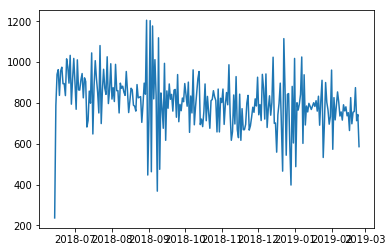

In [14]:
plt.plot(sleep_day)

### Alt 2. Look at sleep duration in graph

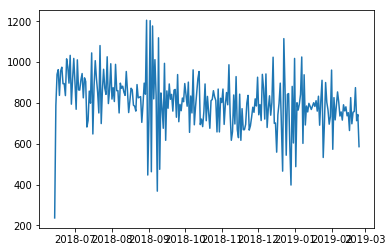

In [15]:
plt.plot(all_sleep.groupby(['Date'])['Duration'].sum())

### Get more info about sleep per day

In [16]:
sleep_day.describe()

,Duration
count,256.000000
mean,804.128906
std,133.682163
min,237.000000
25%,735.250000
50%,805.000000
75%,872.000000
max,1205.000000


In [17]:
# First day should be excluded, it is not a full day of data

# NURSING

In [18]:
table_feed = pd.read_sql_query("SELECT * from nursing", db)

In [19]:
table_feed.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,DescID,FinishSide,LeftDuration,RightDuration,BothDuration
0,0BB6B11B-56B7-40D1-B3AC-D4261D854558,1.528997e+09,1.528993e+09,Fell asleep after left side,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,15,0,0
1,2AAB21E8-4DE4-42D3-8AF5-65356620F03B,1.528998e+09,1.528997e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,2,0,10,0
2,68D7F445-D2E2-46E9-B5AF-0494DE4E560C,1.529006e+09,1.529006e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,12,0,0
3,963CE4DA-504F-4D36-A833-79D80CB520FF,1.529012e+09,1.529011e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,2,0,15,0
4,0888A437-DECE-40AA-BFB7-84E9C76EF92D,1.529015e+09,1.529015e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,8,0,0


In [20]:
# Drop columns note interesting
all_feed = table_feed.drop(['ID','Note','HasPicture','BabyID','DescID','Time'], axis=1)

In [21]:
# Make the Timestamp into Data and Time
all_feed['Date'] = all_feed['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_feed['Time'] = all_feed['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_feed = all_feed.drop(['Timestamp'], axis=1)

In [22]:
all_feed.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Date,Time
0,1,15,0,0,2018-06-14,13:15:18.110130
1,2,0,10,0,2018-06-14,13:41:26.209713
2,1,12,0,0,2018-06-14,15:59:14.162141
3,2,0,15,0,2018-06-14,17:25:41.034220
4,1,8,0,0,2018-06-14,18:31:21.744594


In [23]:
all_feed['Duration'] = all_feed['LeftDuration'] + all_feed['RightDuration']

In [24]:
all_feed.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Date,Time,Duration
0,1,15,0,0,2018-06-14,13:15:18.110130,15
1,2,0,10,0,2018-06-14,13:41:26.209713,10
2,1,12,0,0,2018-06-14,15:59:14.162141,12
3,2,0,15,0,2018-06-14,17:25:41.034220,15
4,1,8,0,0,2018-06-14,18:31:21.744594,8


In [25]:
# Get the duration (in min) for each date
feed_day = all_feed.groupby('Date').sum()
feed_day.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2018-06-14,13,57,45,0,102
2018-06-15,24,90,74,0,164
2018-06-16,18,59,59,0,118
2018-06-17,19,56,58,0,114
2018-06-18,17,46,43,0,89


In [26]:
feed_day.sort_values(by='Duration', ascending=False).head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2018-06-15,24,90,74,0,164
2018-07-07,21,74,78,0,152
2018-07-11,23,67,82,0,149
2018-07-21,23,62,79,0,141
2018-06-29,22,66,73,0,139


In [27]:
feed_day.sort_values(by='Duration', ascending=True).head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2019-02-22,2,0,3,0,3
2019-02-24,1,4,0,0,4
2019-02-23,3,4,2,0,6
2019-02-21,3,4,3,0,7
2019-02-20,3,3,4,0,7


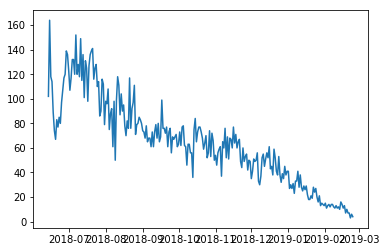

In [28]:
plt.plot(feed_day['Duration'])

# DIAPER

In [29]:
table_diaper = pd.read_sql_query("SELECT * from diaper", db)

In [30]:
table_diaper.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,Status,PeeColor,PooColor,Amount,Texture,Flag
0,A7E8EDDE-B026-4330-A615-E195A728D38A,1.529004e+09,1.529003e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,2,5,5,2,5,0
1,0995143E-53D4-493F-946D-2653CA439736,1.529012e+09,1.529010e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,2,5,5,2,5,0
2,59BBB1F9-B5D1-4A34-AC31-A1FDD2587085,1.529023e+09,1.529020e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,0,5,5,2,5,0
3,A2CADB32-222B-4A69-9605-59B253AB0ED3,1.529032e+09,1.529031e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,0,5,5,2,5,0
4,C4290E80-A6D1-4867-AE43-C5FC0EC4C590,1.529038e+09,1.529036e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,1,5,5,2,5,0


In [31]:
# Drop columns note interesting
all_diaper = table_diaper.drop(['ID', 'Time','Note','HasPicture','BabyID','PeeColor','PooColor','Amount',
                                'Texture','Flag'], axis=1)

In [32]:
# Make the Timestamp into Data and Time
all_diaper['Date'] = all_diaper['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_diaper['Time'] = all_diaper['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_diaper = all_diaper.drop(['Timestamp'], axis=1)

In [33]:
all_diaper.head()

,Status,Date,Time
0,2,2018-06-14,15:13:28.063882
1,2,2018-06-14,17:26:32.668216
2,0,2018-06-14,20:36:51.960752
3,0,2018-06-14,23:12:55.856503
4,1,2018-06-15,00:44:09.614841


In [34]:
# Status
# 0 = wet
# 1 = mix
# 2 = dirty

In [35]:
# Get the number of diapers for each date
diaper_day = all_diaper.groupby('Date').count()
diaper_day.head()

,Status,Time
Date,,
2018-06-14,4,4
2018-06-15,9,9
2018-06-16,9,9
2018-06-17,8,8
2018-06-18,9,9


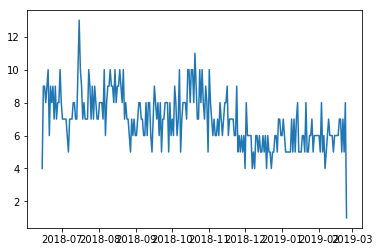

In [36]:
plt.plot(diaper_day['Status'])

In [37]:
# Gor om sa att status laggs som kolumner istallet (har kan man nog anvanda dummy variabler...) 
# for att se vilken typ av bloja

# SLEEP, NURSING and DIAPER

## Sleep

In [38]:
all_sleep.head(3)

,Duration,Date,Time
0,45,2018-06-14,13:31:58.695606
1,80,2018-06-14,15:13:40.276892
2,41,2018-06-14,18:21:48.476691


In [39]:
all_sleep_base = all_sleep.drop('Time', axis=1)
all_sleep_base = all_sleep_base.rename(index=str, columns={"Duration": "Duration_sleep", "Date": "Date"})
all_sleep_base.head(3)

,Duration_sleep,Date
0,45,2018-06-14
1,80,2018-06-14
2,41,2018-06-14


### Total duration of sleep per day

In [40]:
sleep_duration_day = all_sleep_base.groupby('Date').sum()
sleep_duration_day.head(3)

,Duration_sleep
Date,
2018-06-14,237
2018-06-15,788
2018-06-16,940


### Total number of times slep per day

In [41]:
sleep_times_day = all_sleep_base.groupby('Date').count()
sleep_times_day.head(3)

,Duration_sleep
Date,
2018-06-14,5
2018-06-15,10
2018-06-16,7


### Combine duration and number of times for sleep

In [42]:
sleep_day_base = pd.merge(sleep_duration_day, sleep_times_day, on = "Date")
sleep_day_base = sleep_day_base.rename(index=str, columns={"Duration_sleep_x": "Duration_sleep", 
                                                           "Duration_sleep_y": "Times_sleep"})
sleep_day_base.head(3)

,Duration_sleep,Times_sleep
Date,,
2018-06-14,237,5
2018-06-15,788,10
2018-06-16,940,7


## Nursing

In [43]:
all_feed.head(3)

,FinishSide,LeftDuration,RightDuration,BothDuration,Date,Time,Duration
0,1,15,0,0,2018-06-14,13:15:18.110130,15
1,2,0,10,0,2018-06-14,13:41:26.209713,10
2,1,12,0,0,2018-06-14,15:59:14.162141,12


In [44]:
all_feed_base = all_feed.drop(['Time', 'FinishSide', 'LeftDuration', 'RightDuration', 'BothDuration'], axis=1)
all_feed_base = all_feed_base.rename(index=str, columns={"Date": "Date", "Duration": "Duration_feed"})
all_feed_base.head(3)

,Date,Duration_feed
0,2018-06-14,15
1,2018-06-14,10
2,2018-06-14,12


#### Duration for feeding on each side

In [72]:
# Left side in minutes
all_feed['LeftDuration'].sum()

8038

In [73]:
# Right side in minutes
all_feed['RightDuration'].sum()

8496

In [74]:
# Both sides in minutes
all_feed['BothDuration'].sum()

0

### Total duration of nursing per day

In [45]:
feed_duration_day = all_feed_base.groupby('Date').sum()
feed_duration_day.head(3)

,Duration_feed
Date,
2018-06-14,102
2018-06-15,164
2018-06-16,118


### Total number of times nursing per day

In [46]:
feed_times_day = all_feed_base.groupby('Date').count()
feed_times_day.head(3)

,Duration_feed
Date,
2018-06-14,9
2018-06-15,16
2018-06-16,12


### Combine duration and number of times for feeding

In [47]:
feed_day_base = pd.merge(feed_duration_day, feed_times_day, on = "Date")
feed_day_base = feed_day_base.rename(index=str, columns={"Duration_feed_x": "Duration_feed", 
                                                         "Duration_feed_y": "Times_feed"})
feed_day_base.head()

,Duration_feed,Times_feed
Date,,
2018-06-14,102,9
2018-06-15,164,16
2018-06-16,118,12
2018-06-17,114,13
2018-06-18,89,12


## Diaper

In [48]:
all_diaper.head(3)

,Status,Date,Time
0,2,2018-06-14,15:13:28.063882
1,2,2018-06-14,17:26:32.668216
2,0,2018-06-14,20:36:51.960752


In [49]:
all_diaper_base = all_diaper.drop(['Time'], axis=1)
all_diaper_base.head(3)

,Status,Date
0,2,2018-06-14
1,2,2018-06-14
2,0,2018-06-14


### Total number of diapers per day

Duration for diapers: n/a

In [50]:
diaper_times_day = all_diaper_base.groupby('Date').count()
diaper_day_base = diaper_times_day.rename(index=str, columns={"Status": "Times_diaper"})
diaper_day_base.head()

,Times_diaper
Date,
2018-06-14,4
2018-06-15,9
2018-06-16,9
2018-06-17,8
2018-06-18,9


If I want to see the longest nap or the longest time fed I need to look at the data before it is grouped by days.

In [51]:
# It seems like naps that start one day and finish the next are logged on the day that the nap finish
# Look into what can be done to this...

## Combine sleeping, feeding and diaper data

In [52]:
day_sleep_feed = pd.merge(sleep_day_base, feed_day_base, on = "Date")
day_sleep_feed_diaper = pd.merge(day_sleep_feed, diaper_day_base, on = "Date")
day_sleep_feed_diaper.head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-06-14,237,5,102,9,4
2018-06-15,788,10,164,16,9
2018-06-16,940,7,118,12,9
2018-06-17,963,7,114,13,8
2018-06-18,837,6,89,12,9


#### Note: 2018-06-14 was the first day the app whas used and does not contain a full day of logging. This day should be excluded from the data!

In [53]:
day_sleep_feed_diaper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 2018-06-14 to 2019-02-24
Data columns (total 5 columns):
Duration_sleep    256 non-null int64
Times_sleep       256 non-null int64
Duration_feed     256 non-null int64
Times_feed        256 non-null int64
Times_diaper      256 non-null int64
dtypes: int64(5)
memory usage: 12.0+ KB


In [54]:
day_sleep_feed_diaper.isnull().sum()

Duration_sleep    0
Times_sleep       0
Duration_feed     0
Times_feed        0
Times_diaper      0
dtype: int64

In [55]:
day_sleep_feed_diaper.describe()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
count,256.000000,256.000000,256.000000,256.000000,256.000000
mean,804.128906,6.394531,64.585938,9.843750,6.964844
std,133.682163,1.617493,34.997597,3.530122,1.621768
min,237.000000,2.000000,3.000000,1.000000,1.000000
25%,735.250000,5.000000,38.000000,8.000000,6.000000
50%,805.000000,6.000000,63.500000,10.000000,7.000000
75%,872.000000,7.000000,82.250000,12.000000,8.000000
max,1205.000000,11.000000,164.000000,19.000000,13.000000


### Days the baby nap the longest time in total?

In [56]:
day_sleep_feed_diaper.sort_values(by='Duration_sleep', ascending=False).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-08-30,1205,9,83,11,7
2018-09-02,1203,6,73,10,7
2018-09-04,1177,6,78,10,8
2018-09-09,1119,9,73,10,8
2018-12-23,1115,4,38,8,4


### Days the baby nap the shortest time in total?

In [57]:
day_sleep_feed_diaper.sort_values(by='Duration_sleep', ascending=True).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-06-14,237,5,102,9,4
2018-09-08,368,5,61,8,6
2018-12-29,398,7,45,11,7
2018-08-31,447,6,80,9,6
2018-09-03,463,7,68,8,8


### Days the baby nap the most times?

In [58]:
day_sleep_feed_diaper.sort_values(by='Times_sleep', ascending=False).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-11-16,843,11,77,15,9
2018-11-19,669,10,60,12,7
2018-10-15,721,10,84,14,10
2018-10-18,893,10,77,15,10
2018-06-15,788,10,164,16,9


### Days the baby nap the least times?

In [59]:
day_sleep_feed_diaper.sort_values(by='Times_sleep', ascending=True).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2019-02-24,586,2,4,1,1
2019-02-22,713,3,3,1,5
2019-02-20,758,3,7,2,5
2019-02-05,785,3,12,3,6
2019-02-16,665,3,11,3,6


### Days the baby nursed the longest time in total?

In [60]:
day_sleep_feed_diaper.sort_values(by='Duration_feed', ascending=False).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-06-15,788,10,164,16,9
2018-07-07,944,9,152,13,7
2018-07-11,682,7,149,16,8
2018-07-21,751,9,141,15,7
2018-06-29,915,6,139,14,10


### Days the baby nursed the shortest time in total?

In [61]:
day_sleep_feed_diaper.sort_values(by='Duration_feed', ascending=True).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2019-02-22,713,3,3,1,5
2019-02-24,586,2,4,1,1
2019-02-23,743,4,6,2,8
2019-02-21,875,4,7,2,7
2019-02-20,758,3,7,2,5


### Days the baby nursed the most times?

In [62]:
day_sleep_feed_diaper.sort_values(by='Times_feed', ascending=False).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-07-24,864,7,128,19,9
2018-07-20,852,9,139,17,7
2018-07-11,682,7,149,16,8
2018-06-30,1018,6,136,16,8
2018-06-15,788,10,164,16,9


### Days the baby nursed the least times?

In [63]:
day_sleep_feed_diaper.sort_values(by='Times_feed', ascending=True).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2019-02-24,586,2,4,1,1
2019-02-22,713,3,3,1,5
2019-02-21,875,4,7,2,7
2019-02-20,758,3,7,2,5
2019-02-23,743,4,6,2,8


### Days the baby used the most diapers?

In [64]:
day_sleep_feed_diaper.sort_values(by='Times_diaper', ascending=False).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2018-07-15,1045,6,131,14,13
2018-10-20,832,7,73,15,11
2018-10-14,694,9,75,13,10
2018-10-24,817,8,70,12,10
2018-07-14,799,7,101,13,10


### Days the baby used the least diapers?

In [65]:
day_sleep_feed_diaper.sort_values(by='Times_diaper', ascending=True).head()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper
Date,,,,,
2019-02-24,586,2,4,1,1
2019-02-06,854,5,14,4,4
2018-12-23,1115,4,38,8,4
2018-12-19,799,6,38,8,4
2018-12-09,680,4,37,8,4


### Plot duration nursing and sleeping

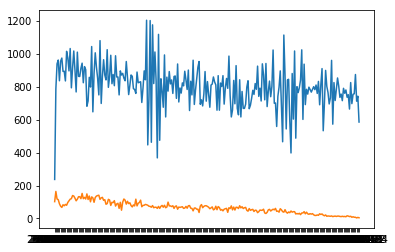

In [66]:
plt.plot(day_sleep_feed_diaper[['Duration_sleep', 'Duration_feed']])

### Plot times nursing, sleeping and diapers

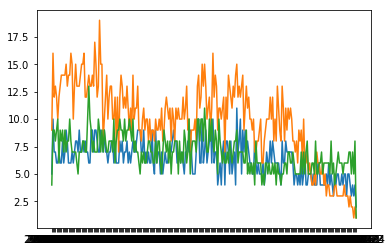

In [67]:
plt.plot(day_sleep_feed_diaper[['Times_sleep', 'Times_feed', 'Times_diaper']])

## Is sleeping, nursing and diapers correlated?

### Duration

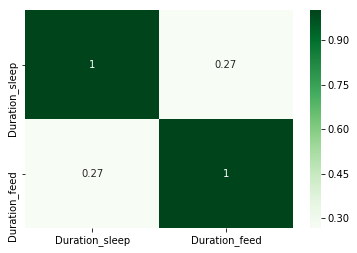

In [68]:
sns.heatmap(day_sleep_feed_diaper[['Duration_sleep','Duration_feed']].corr(), annot = True, cmap="Greens")

### Times

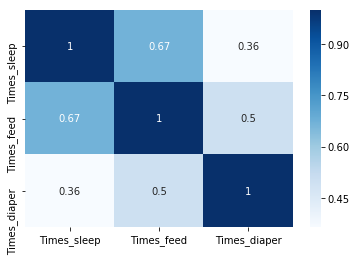

In [69]:
sns.heatmap(day_sleep_feed_diaper[['Times_sleep','Times_feed', 'Times_diaper']].corr(), annot = True, cmap="Blues")

### Nursing duration and number of diapers

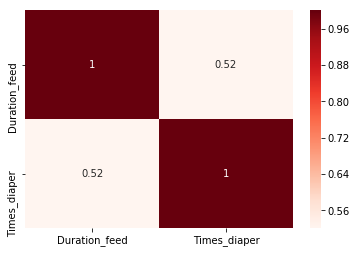

In [70]:
sns.heatmap(day_sleep_feed_diaper[['Duration_feed', 'Times_diaper']].corr(), annot = True, cmap="Reds")

## Export data

In [75]:
# Save to CSV
day_sleep_feed_diaper.to_csv('day_sleep_feed_diaper.csv')

## Pair data with Wonder week data

Do this in other notebook...

## Use ML to see if we can get duration or times for sleeping, nursing and diapers

Do this in an other notebook...